In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib
plt.rcParams['font.sans-serif']=['SimHei']    #指定默认字体 SimHei为黑体
plt.rcParams['axes.unicode_minus']=False   #用来|正常显示负号
matplotlib.rcParams['font.family'] = 'SimHei'  
matplotlib.rcParams['font.sans-serif'] = 'NSimSun,Times New Roman'

In [14]:
#读取文件
train_pro = pd.read_csv('分省.csv', encoding='utf-8')
display(train_pro.info())
display(train_pro.head())

train_city = pd.read_csv('地级市.csv', encoding='utf-8')
display(train_city.info())
display(train_city.head())

validition = pd.read_csv('验证集.csv', encoding='utf-8')
display(validition.info())
display(validition.head())

prediction = pd.read_csv('预测集.csv', encoding='utf-8')
display(prediction.info())
display(prediction.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382 entries, 0 to 381
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PROVINCE   382 non-null    object 
 1   YEAR       382 non-null    int64  
 2   SLUDGE     374 non-null    float64
 3   GDP        380 non-null    float64
 4   POP        382 non-null    int64  
 5   LDP        382 non-null    float64
 6   BA         379 non-null    float64
 7   CCF        382 non-null    float64
 8   WWP        382 non-null    float64
 9   CCF_P      382 non-null    float64
 10  GDP_CCF_P  382 non-null    float64
 11  GDP2       382 non-null    float64
 12  GDP_POP    382 non-null    float64
 13  GDP_LDP    382 non-null    float64
 14  GDP_BA     382 non-null    float64
dtypes: float64(12), int64(2), object(1)
memory usage: 44.9+ KB


None

,PROVINCE,YEAR,SLUDGE,GDP,POP,LDP,BA,CCF,WWP,CCF_P,GDP_CCF_P,GDP2,GDP_POP,GDP_LDP,GDP_BA
0,北京市,2006,889876.0,8117.78,15810000,7523.0,1254.23,8.867282e+08,129138.0,56.08654,455298.1927,6.589835e+07,1.280000e+11,6.107006e+07,1.018156e+07
1,天津市,2006,89713.0,4462.74,10750000,11939.0,539.98,6.859347e+08,69076.0,63.80788,284757.9784,1.991605e+07,4.797446e+10,5.328065e+07,2.409790e+06
2,河北省,2006,224955.0,11467.60,68980000,11359.0,1416.97,5.181698e+09,121278.0,75.11885,861432.9243,1.315058e+08,7.910000e+11,1.302605e+08,1.624925e+07
3,山西省,2006,72096.0,4878.61,33750000,4154.0,733.86,2.631299e+09,58059.0,77.96442,380357.9991,2.380084e+07,1.650000e+11,2.026575e+07,3.580217e+06
4,内蒙古自治区,2006,130914.0,4944.25,23970000,4779.0,830.09,1.912898e+09,37954.0,79.80382,394570.0370,2.444561e+07,1.190000e+11,2.362857e+07,4.104172e+06


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3475 entries, 0 to 3474
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PROVINCE  3475 non-null   object 
 1   CITY      3472 non-null   object 
 2   YEAR      3475 non-null   int64  
 3   SLUDGE    3457 non-null   float64
 4   GDP       3375 non-null   float64
 5   POP       3412 non-null   float64
 6   LDP       3449 non-null   float64
 7   BA        3451 non-null   float64
 8   PPI       3457 non-null   float64
 9   CCF       3475 non-null   float64
 10  WWP       3464 non-null   float64
 11  CCF_P     3475 non-null   float64
dtypes: float64(9), int64(1), object(2)
memory usage: 325.9+ KB


None

,PROVINCE,CITY,YEAR,SLUDGE,GDP,POP,LDP,BA,PPI,CCF,WWP,CCF_P
0,北京市,北京,2006,889876.0,7870.2835,15810000.0,7523.0,1254.23,1.25,886728197.4,95284.0,56.08654
1,天津市,天津,2006,89713.0,4359.1500,7779100.0,11939.0,539.98,2.71,496367879.3,41086.0,63.80788
2,河北省,石家庄,2006,84126.0,2026.6320,5081300.0,2063.0,256.01,12.71,381701412.5,21440.0,75.11885
3,河北省,唐山,2006,83604.0,2362.1410,4392100.0,2158.0,250.09,10.84,329929501.1,15054.0,75.11885
4,河北省,秦皇岛,2006,27057.0,552.0509,788700.0,1141.0,82.62,10.54,59246237.0,7682.0,75.11885


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PROVINCE   64 non-null     object 
 1   CITY       64 non-null     object 
 2   YEAR       64 non-null     int64  
 3   SLUDGE     64 non-null     float64
 4   GDP        64 non-null     float64
 5   POP        64 non-null     int64  
 6   LDP        64 non-null     float64
 7   BA         64 non-null     float64
 8   CCF        64 non-null     float64
 9   WWP        64 non-null     float64
 10  CCF_P      64 non-null     float64
 11  GDP_CCF_P  64 non-null     float64
 12  GDP2       64 non-null     float64
 13  GDP_POP    64 non-null     float64
 14  GDP_LDP    64 non-null     float64
 15  GDP_BA     64 non-null     float64
dtypes: float64(12), int64(2), object(2)
memory usage: 8.1+ KB


None

,PROVINCE,CITY,YEAR,SLUDGE,GDP,POP,LDP,BA,CCF,WWP,CCF_P,GDP_CCF_P,GDP2,GDP_POP,GDP_LDP,GDP_BA
0,全国,全国,2018,11758781.26,772062.56050,1384421573,683484.75,58455.66,9.894950e+10,5211248.73,71.473534,7.639520e+16,5.960810e+11,1.068860e+15,5.276930e+11,4.513143e+10
1,北京市,北京市,2018,1724892.44,22309.34548,21365017,17646.01,1469.05,1.275445e+09,193202.00,59.697826,1.331819e+06,1.722421e+10,1.650000e+13,1.362382e+10,1.134199e+09
2,天津市,天津市,2018,124451.96,15801.48192,12559198,21369.29,1077.83,9.741115e+08,104090.47,77.561600,1.225588e+06,1.219973e+10,9.700000e+12,1.649843e+10,8.321522e+08
3,河北省,河北省,2018,514386.65,31065.72761,77128852,20655.24,2162.73,5.355396e+09,175787.42,69.434400,2.157030e+06,2.398469e+10,5.950000e+13,1.594714e+10,1.669763e+09
4,山西省,山西省,2018,196051.79,12434.90905,36404478,8395.94,1180.11,2.432784e+09,82696.95,66.826500,8.309814e+05,9.600528e+09,2.810000e+13,6.482191e+09,9.111187e+08


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12555 entries, 0 to 12554
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PROVINCE   12555 non-null  object 
 1   SSP        12555 non-null  object 
 2   YEAR       12555 non-null  int64  
 3   GDP        12555 non-null  float64
 4   POP        12555 non-null  int64  
 5   LDP        12555 non-null  float64
 6   BA         12555 non-null  float64
 7   CCF        12555 non-null  int64  
 8   人均CCF      12555 non-null  int64  
 9   GDP_CCF_P  12555 non-null  float64
 10  GDP2       12555 non-null  float64
 11  GDP_POP    12555 non-null  float64
 12  GDP_LDP    12555 non-null  float64
 13  GDP_BA     12555 non-null  float64
dtypes: float64(8), int64(4), object(2)
memory usage: 1.3+ MB


None

,PROVINCE,SSP,YEAR,GDP,POP,LDP,BA,CCF,人均CCF,GDP_CCF_P,GDP2,GDP_POP,GDP_LDP,GDP_BA
0,安徽省,SSP1,2020,25098.66508,59553012,36771.85322,2230.975467,3573180720,60,1505919.905,629942988.8,1.494700e+12,9.229244e+08,55994506.05
1,安徽省,SSP1,2021,26341.53474,59541502,39286.51899,2283.182068,3572490120,60,1580492.084,661137358.1,1.494410e+12,9.860392e+08,57304822.04
2,安徽省,SSP1,2022,27563.63558,59499476,41743.54592,2331.820763,3569968560,60,1653818.135,691810457.8,1.493360e+12,1.047707e+09,58525588.36
3,安徽省,SSP1,2023,28751.04266,59429980,44118.42901,2376.956310,3565798800,60,1725062.560,721612790.4,1.491610e+12,1.107314e+09,59658430.33
4,安徽省,SSP1,2024,29889.35633,59336071,46390.03731,2418.687370,3560164260,60,1793361.380,750182944.0,1.489260e+12,1.164328e+09,60705824.23


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:29: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:30: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:46: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:47: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:67: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:68: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
D:\Anaconda\lib\site-p

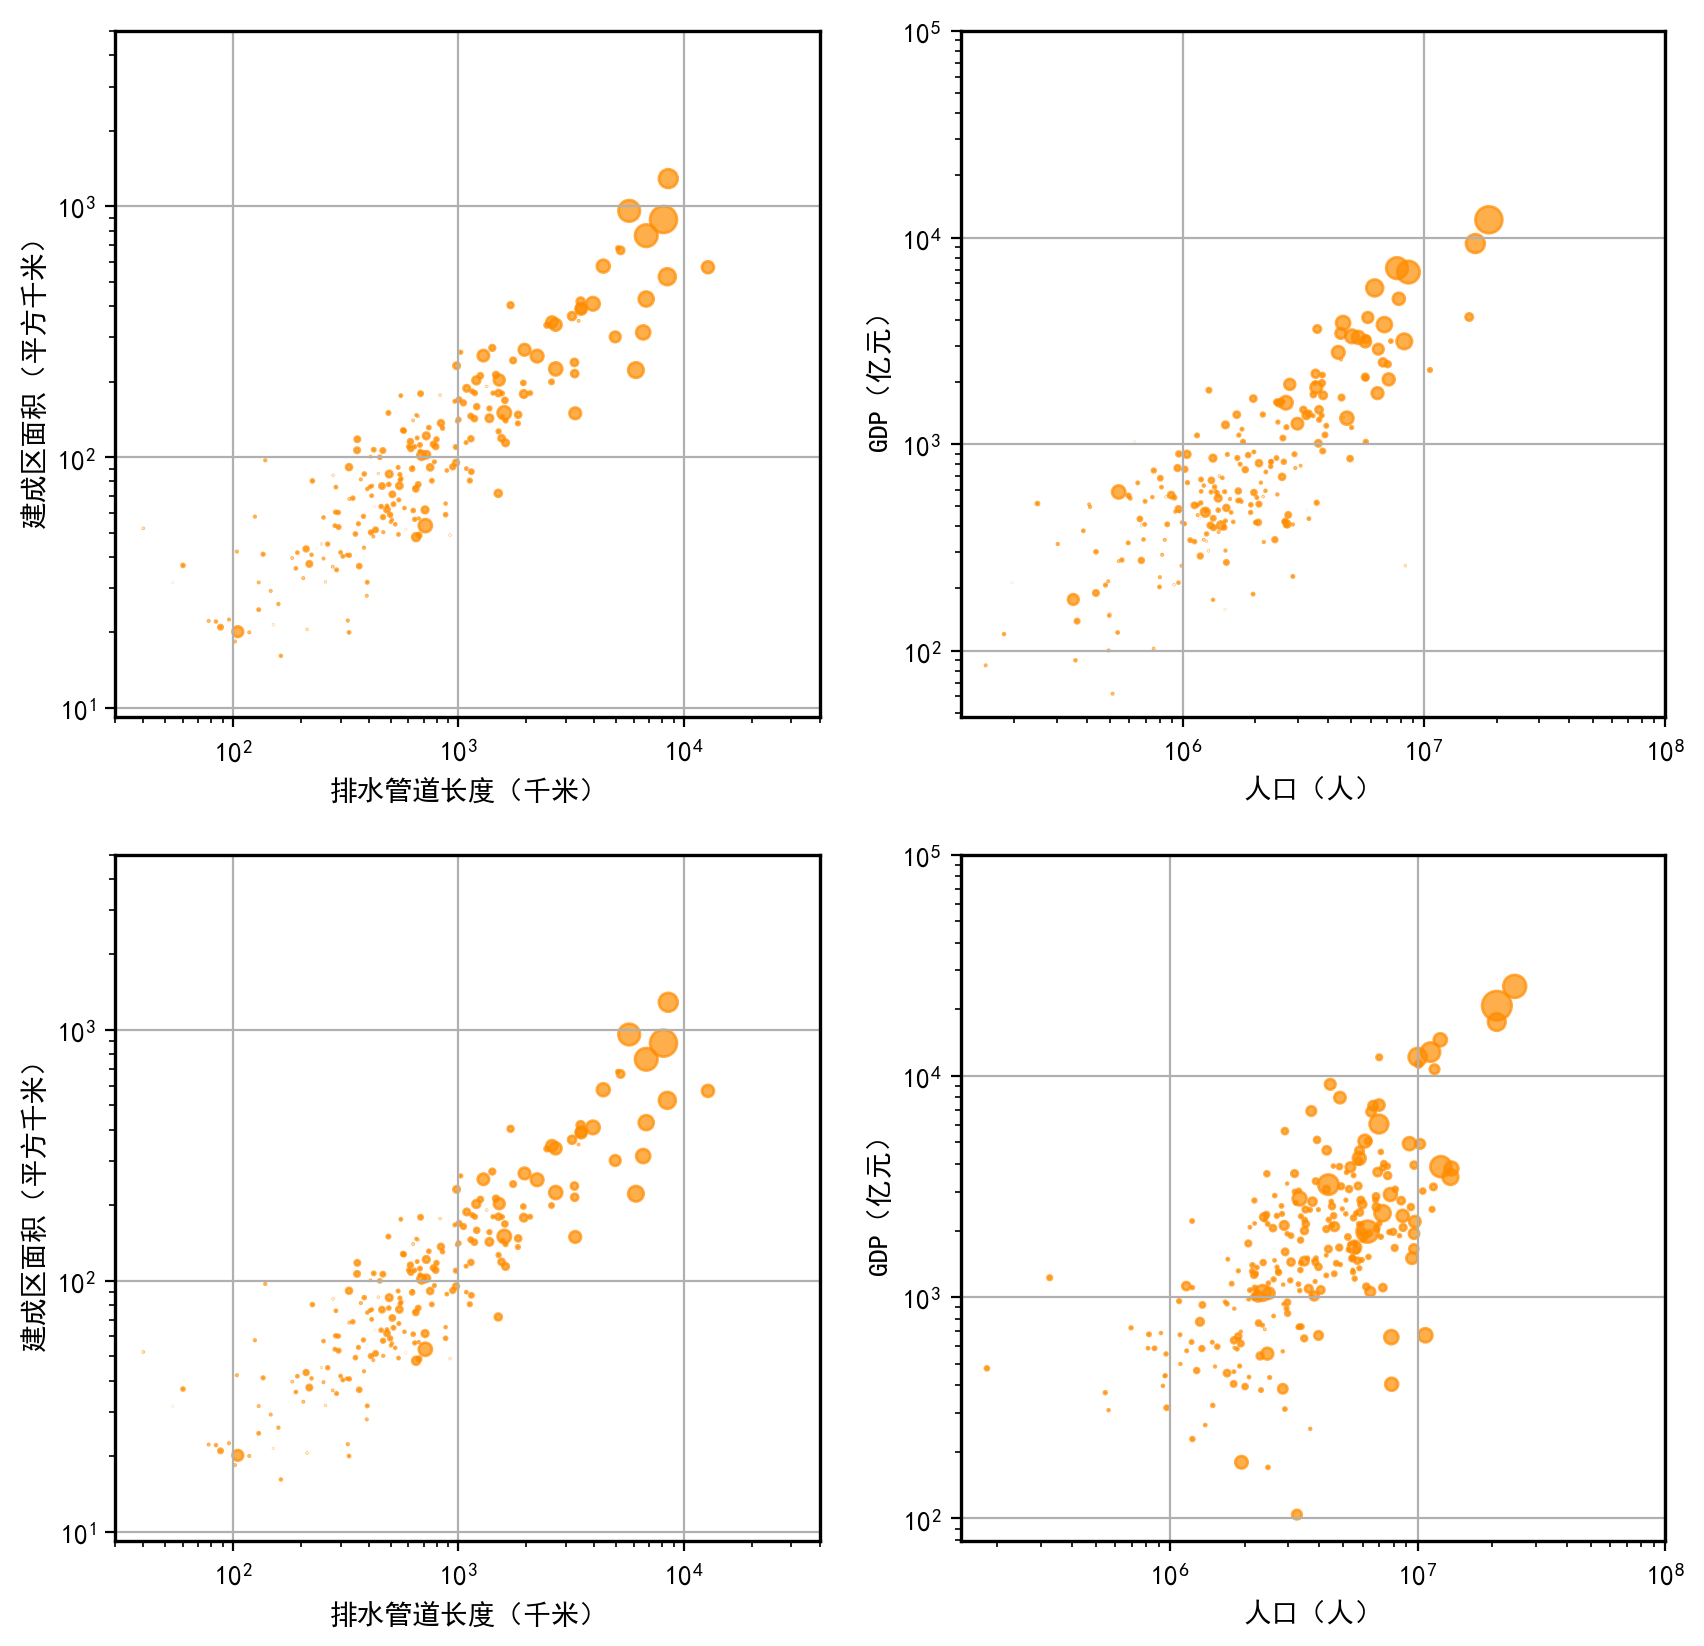

In [49]:
#可视化展示CCF-SLUDGE-POP,2006;2017
train_city_dna = train_city.dropna()
train_city_dna_2006 = train_city_dna[train_city_dna['YEAR'] == 2006]
train_city_dna_2007 = train_city_dna[train_city_dna['YEAR'] == 2007]
train_city_dna_2010 = train_city_dna[train_city_dna['YEAR'] == 2010]
train_city_dna_2017 = train_city_dna[train_city_dna['YEAR'] == 2017]


font1 = {'family' : 'Times New Roman',
'weight' : 'bald',
'size'   : 23,
}

plt.figure(figsize=(10,10), dpi=200)
plt.figure(1)




ax1 = plt.subplot(221)
plt.scatter(train_city_dna_2007['LDP'], train_city_dna_2007['BA'], 
            s=train_city_dna_2007['SLUDGE']/5000, c='darkorange',
            alpha=0.7)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("排水管道长度（千米）")
plt.ylabel("建成区面积（平方千米）")

plt.xlim((0, 40000))
plt.ylim((0, 5000))
ax=plt.gca()
ax.spines['bottom'].set_linewidth(1.2)
ax.spines['left'].set_linewidth(1.2)
ax.spines['right'].set_linewidth(1.2)
ax.spines['top'].set_linewidth(1.2)
plt.grid(True)

ax2 = plt.subplot(222)
plt.scatter(train_city_dna_2007['POP'], train_city_dna_2007['GDP'], 
            s=train_city_dna_2007['SLUDGE']/5000, c='darkorange',
            alpha=0.7)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("人口（人）")
plt.ylabel("GDP（亿元）")
plt.xlim((0, 100000000))
plt.ylim((0, 100000))
ax=plt.gca()
ax.spines['bottom'].set_linewidth(1.2)
ax.spines['left'].set_linewidth(1.2)
ax.spines['right'].set_linewidth(1.2)
ax.spines['top'].set_linewidth(1.2)
plt.grid(True)




ax3 = plt.subplot(223)
plt.scatter(train_city_dna_2007['LDP'], train_city_dna_2007['BA'],
            s=train_city_dna_2007['SLUDGE']/5000,
            c='darkorange',
            alpha=0.7)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("排水管道长度（千米）")
plt.ylabel("建成区面积（平方千米）")
plt.xlim((0, 40000))
plt.ylim((0, 5000))
ax=plt.gca()
ax.spines['bottom'].set_linewidth(1.2)
ax.spines['left'].set_linewidth(1.2)
ax.spines['right'].set_linewidth(1.2)
ax.spines['top'].set_linewidth(1.2)
plt.grid(True)







ax4 = plt.subplot(224)
plt.scatter(train_city_dna_2017['POP'], train_city_dna_2017['GDP'], 
            s=train_city_dna_2017['SLUDGE']/5000, c='darkorange',
            alpha=0.7)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("人口（人）")
plt.ylabel("GDP（亿元）")
plt.xlim((0, 100000000))
plt.ylim((0, 100000))
ax=plt.gca()
ax.spines['bottom'].set_linewidth(1.2)
ax.spines['left'].set_linewidth(1.2)
ax.spines['right'].set_linewidth(1.2)
ax.spines['top'].set_linewidth(1.2)
plt.grid(True)



#plt.tick_params(labelsize=5)
#plt.legend()
plt.savefig('sludgeand.jpg')
plt.show()

In [6]:
#训练模型_地级市
train_pro_dna = train_pro.dropna()
col = ['GDP','LDP','BA','POP','CCF']

X = train_city_dna[col].values
Y = train_city_dna.loc[:, 'SLUDGE'].values

x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size=0.3)

forest = RandomForestRegressor(
    n_estimators=1000,
    random_state=1,
    n_jobs=-1)
forest.fit(x_train,y_train)

score = forest.score(x_test, y_test)
result = forest.predict(x_test)
plt.figure()
#只取前一百条可视化，因为数据太多了
plt.plot(np.arange(500), y_test[:500], "go-", label="True value")
plt.plot(np.arange(500), result[:500], "ro-", label="Predict value")
plt.title(f"RandomForest---score:{score}")
plt.legend(loc="best")
plt.show()


NameError: name 'train_city_dna' is not defined

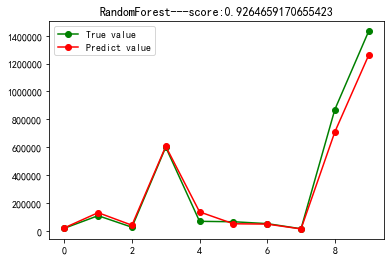

In [3]:
#训练模型_分省
train_pro_dna = train_pro.dropna()

col = ['GDP','LDP','BA','POP','CCF']
X = train_pro_dna[col].values
Y = train_pro_dna.loc[:, 'SLUDGE'].values

x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size=0.1)

forest = RandomForestRegressor(
    n_estimators=2000,
    random_state=1,
    n_jobs=-1)
forest.fit(x_train,y_train)

score_test = forest.score(x_test, y_test)
result_test = forest.predict(x_test)
plt.figure()
#只取前一百条可视化，因为数据太多了
plt.plot(np.arange(10), y_test[:10], "go-", label="True value")
plt.plot(np.arange(10), result_test[:10], "ro-", label="Predict value")
plt.title(f"RandomForest---score:{score_test}")
plt.legend(loc="best")
plt.show()


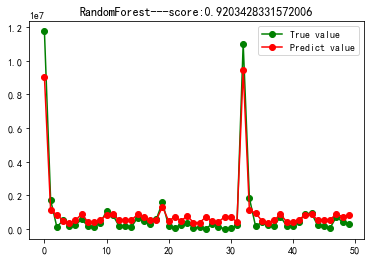

重要性： [0.09128999 0.10710225 0.10612302 0.10758332 0.09556519 0.0935395
 0.0997597  0.09700677 0.0995423  0.10248794]
 1) POP                            0.107583
 2) LDP                            0.107102
 3) BA                             0.106123
 4) GDP_BA                         0.102488
 5) GDP2                           0.099760
 6) GDP_LDP                        0.099542
 7) GDP_POP                        0.097007
 8) CCF                            0.095565
 9) GDP_CCF_P                      0.093540
10) GDP                            0.091290


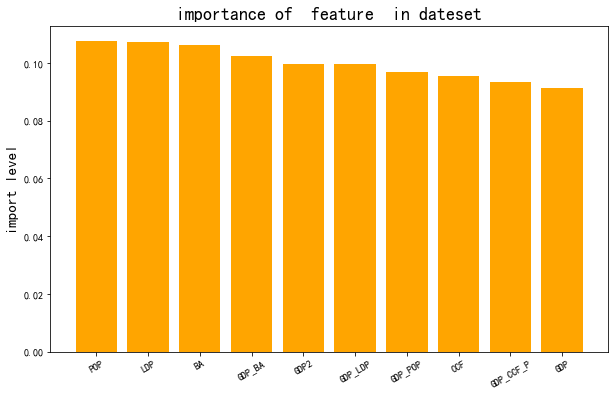

In [8]:
#验证集
validition_vald = validition[col]
score_vald = forest.score(validition_vald, validition['SLUDGE'])
result_vald = forest.predict(validition_vald)
plt.plot(np.arange(50), validition['SLUDGE'][:50], "go-", label="True value")
plt.plot(np.arange(50), result_vald[:50], "ro-", label="Predict value")
plt.title(f"RandomForest---score:{score_vald}")
plt.legend(loc="best")
plt.show()
# 下面对训练好的随机森林，完成重要性评估
# feature_importances_  可以调取关于特征重要程度
importances = forest.feature_importances_
print("重要性：", importances)
x_columns = col
#返回数组从大到小的索引值
indices = np.argsort(importances)[::-1]
for f in range(x_train.shape[1]):
    # 对于最后需要逆序排序，我认为是做了类似决策树回溯的取值，从叶子收敛
    # 到根，根部重要程度高于叶子。
    print("%2d) %-*s %f" % (f + 1, 30, col[indices[f]], importances[indices[f]]))

# 筛选变量（选择重要性比较高的变量）
threshold = 0.15
x_selected = x_train[:, importances > threshold]

# 可视化

plt.figure(figsize=(10, 6))
plt.title("importance of  feature  in dateset", fontsize=18)
plt.ylabel("import level", fontsize=15, rotation=90)

x_columns1 = [x_columns[i] for i in indices]
for i in range(len(x_columns)):
    plt.bar(i, importances[indices[i]], color='orange', align='center')
    plt.xticks(np.arange(len(x_columns)), x_columns1, fontsize=10, rotation =30)


In [7]:
#特征重要性可视化
im = pd.DataFrame(importances, col)
im

,0
GDP,0.195977
LDP,0.202360
BA,0.205040
POP,0.208081
CCF,0.188543


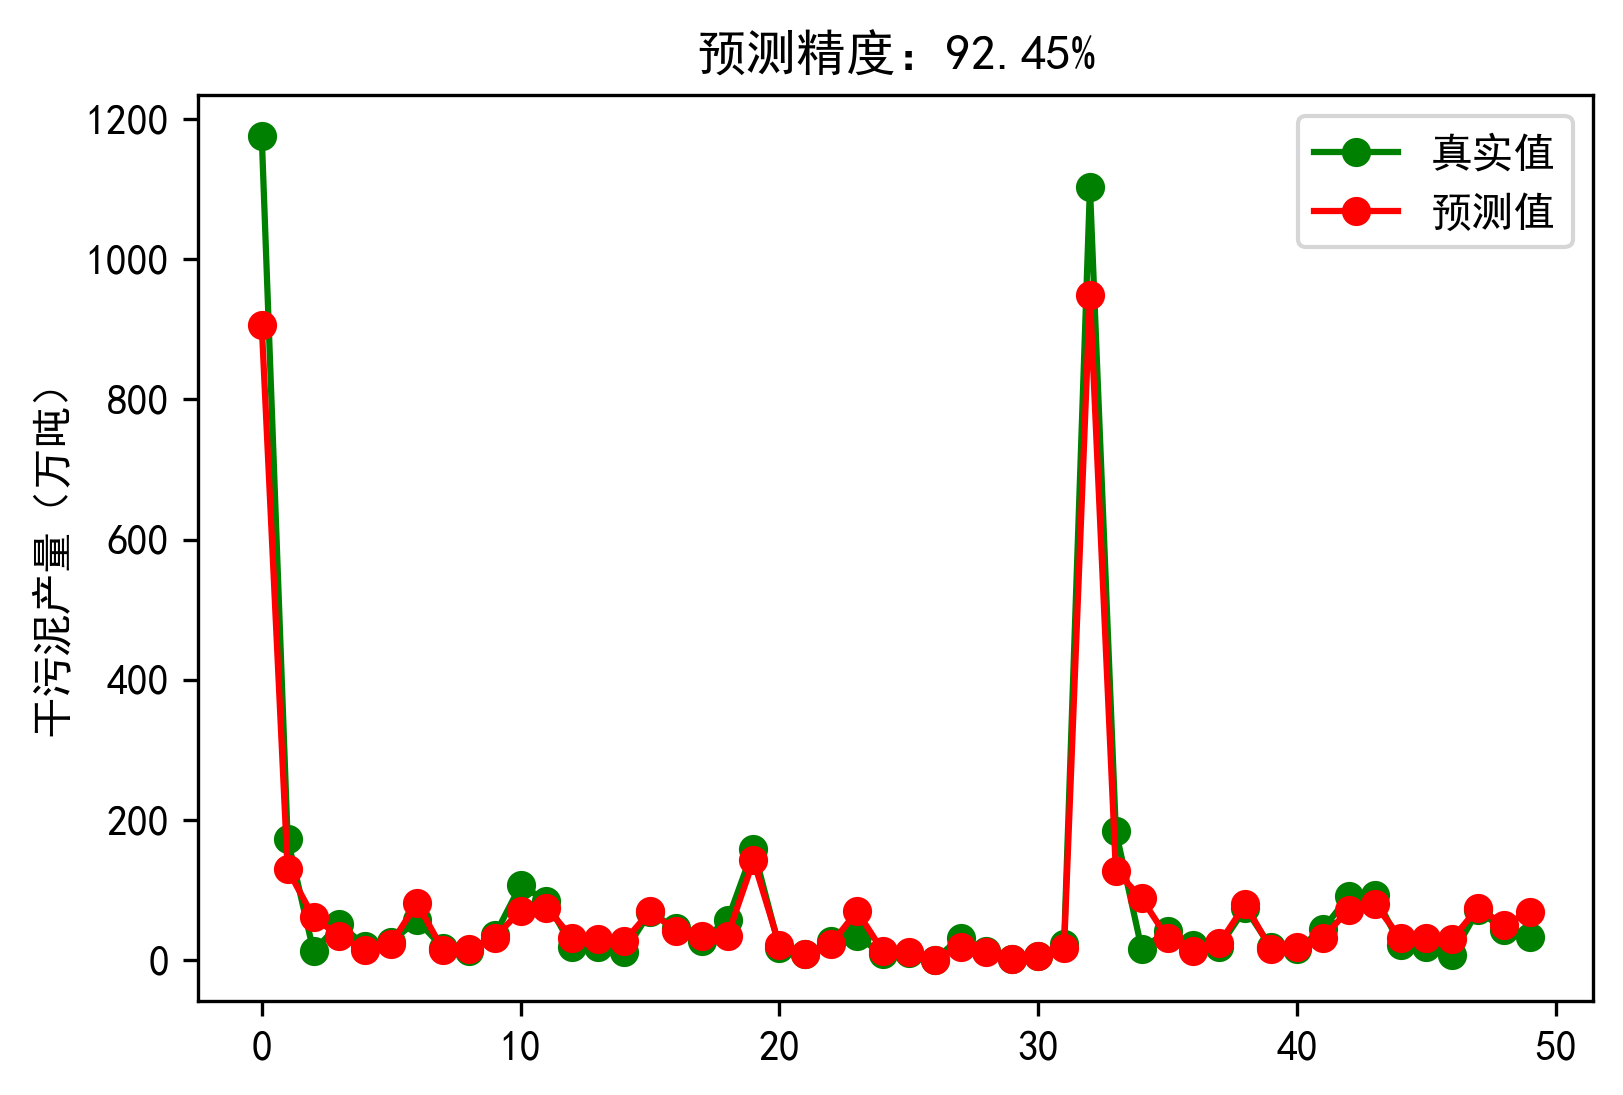

In [5]:
plt.figure(figsize=(6,4), dpi=300)
validition_vald = validition[col]
score_vald = forest.score(validition_vald, validition['SLUDGE'])
result_vald = forest.predict(validition_vald)
plt.plot(np.arange(50), validition['SLUDGE'][:50]/10000, "go-", label="真实值")
plt.plot(np.arange(50), result_vald[:50]/10000, "ro-", label="预测值")
plt.title('预测精度：92.45%')
plt.ylabel('干污泥产量（万吨）')
plt.legend(loc="best")
plt.savefig('vald.png')

In [9]:
#预测集
prediction_pred = prediction[col]
result_pred = forest.predict(prediction_pred)
prediction['result'] = result_pred
prediction.to_csv('prediction_pro.csv', encoding = 'utf_8_sig')
prediction = prediction.groupby(['SSP','YEAR']).sum().reset_index()

SSP1 = prediction[prediction['SSP'] == 'SSP1']
SSP2 = prediction[prediction['SSP'] == 'SSP2']
SSP3 = prediction[prediction['SSP'] == 'SSP3']
SSP4 = prediction[prediction['SSP'] == 'SSP4']
SSP5 = prediction[prediction['SSP'] == 'SSP5']

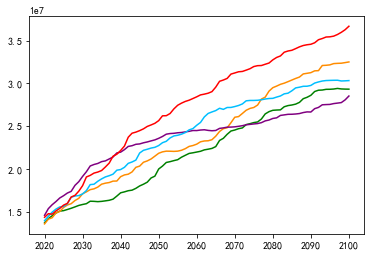

In [10]:
plt.plot(SSP1['YEAR'], SSP1['result'], color='green')
plt.plot(SSP2['YEAR'], SSP2['result'], color='darkorange')
plt.plot(SSP3['YEAR'], SSP3['result'], color='purple')
plt.plot(SSP4['YEAR'], SSP4['result'], color='deepskyblue')
plt.plot(SSP5['YEAR'], SSP5['result'], color='red')

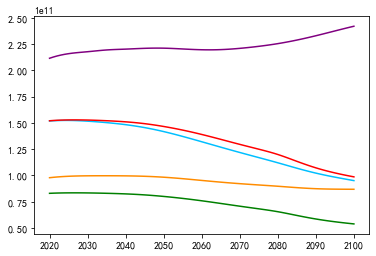

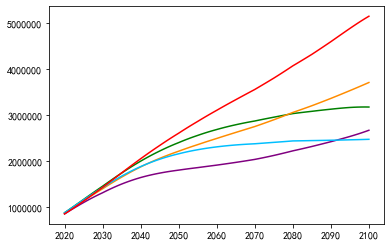

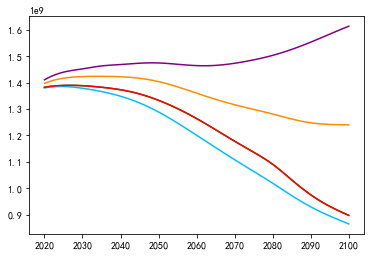

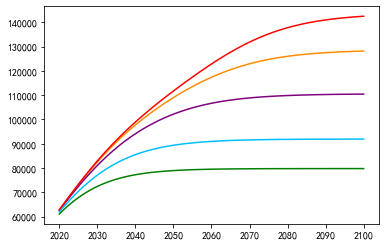

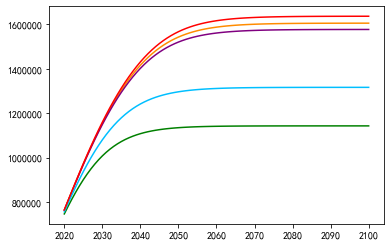

In [15]:
plt.plot(SSP1['YEAR'], SSP1['CCF'], color='green')
plt.plot(SSP2['YEAR'], SSP2['CCF'], color='darkorange')
plt.plot(SSP3['YEAR'], SSP3['CCF'], color='purple')
plt.plot(SSP4['YEAR'], SSP4['CCF'], color='deepskyblue')
plt.plot(SSP5['YEAR'], SSP5['CCF'], color='red')
plt.show()
plt.plot(SSP1['YEAR'], SSP1['GDP'], color='green')
plt.plot(SSP2['YEAR'], SSP2['GDP'], color='darkorange')
plt.plot(SSP3['YEAR'], SSP3['GDP'], color='purple')
plt.plot(SSP4['YEAR'], SSP4['GDP'], color='deepskyblue')
plt.plot(SSP5['YEAR'], SSP5['GDP'], color='red')
plt.show()
plt.plot(SSP1['YEAR'], SSP1['POP'], color='green')
plt.plot(SSP2['YEAR'], SSP2['POP'], color='darkorange')
plt.plot(SSP3['YEAR'], SSP3['POP'], color='purple')
plt.plot(SSP4['YEAR'], SSP4['POP'], color='deepskyblue')
plt.plot(SSP5['YEAR'], SSP5['POP'], color='red')
plt.show()
plt.plot(SSP1['YEAR'], SSP1['BA'], color='green')
plt.plot(SSP2['YEAR'], SSP2['BA'], color='darkorange')
plt.plot(SSP3['YEAR'], SSP3['BA'], color='purple')
plt.plot(SSP4['YEAR'], SSP4['BA'], color='deepskyblue')
plt.plot(SSP5['YEAR'], SSP5['BA'], color='red')
plt.show()
plt.plot(SSP1['YEAR'], SSP1['LDP'], color='green')
plt.plot(SSP2['YEAR'], SSP2['LDP'], color='darkorange')
plt.plot(SSP3['YEAR'], SSP3['LDP'], color='purple')
plt.plot(SSP4['YEAR'], SSP4['LDP'], color='deepskyblue')
plt.plot(SSP5['YEAR'], SSP5['LDP'], color='red')
plt.show()

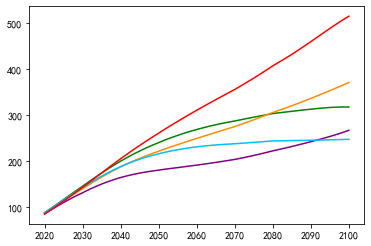

In [16]:
#绘制经济SSP预测变化图
plt.plot(SSP1['YEAR'], SSP1['GDP']/10000, color='green')
plt.plot(SSP2['YEAR'], SSP2['GDP']/10000, color='darkorange')
plt.plot(SSP3['YEAR'], SSP3['GDP']/10000, color='purple')
plt.plot(SSP4['YEAR'], SSP4['GDP']/10000, color='deepskyblue')
plt.plot(SSP5['YEAR'], SSP5['GDP']/10000, color='red')

plt.show()

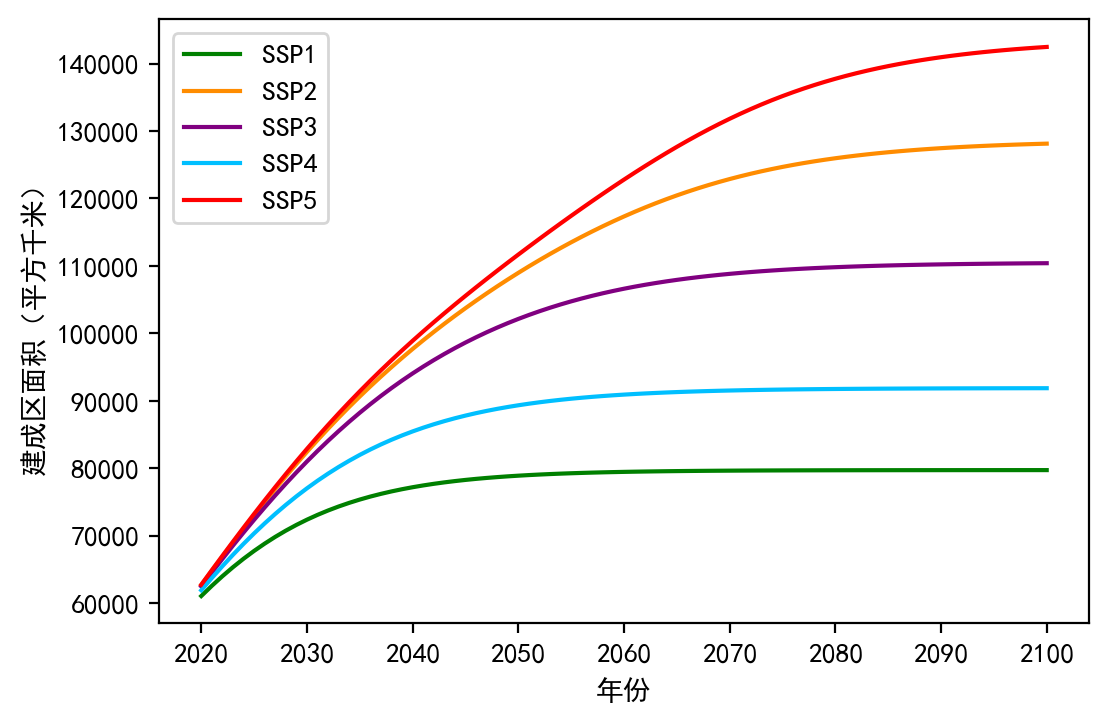

In [17]:
plt.figure(figsize=(6,4), dpi=200)
plt.plot(SSP1['YEAR'], SSP1['BA'], color='green')
plt.plot(SSP2['YEAR'], SSP2['BA'], color='darkorange')
plt.plot(SSP3['YEAR'], SSP3['BA'], color='purple')
plt.plot(SSP4['YEAR'], SSP4['BA'], color='deepskyblue')
plt.plot(SSP5['YEAR'], SSP5['BA'], color='red')
plt.xlabel('年份')
plt.ylabel('建成区面积（平方千米）')
plt.legend(['SSP1', 'SSP2', 'SSP3', 'SSP4', 'SSP5'])
plt.savefig('BA.png')
plt.show()

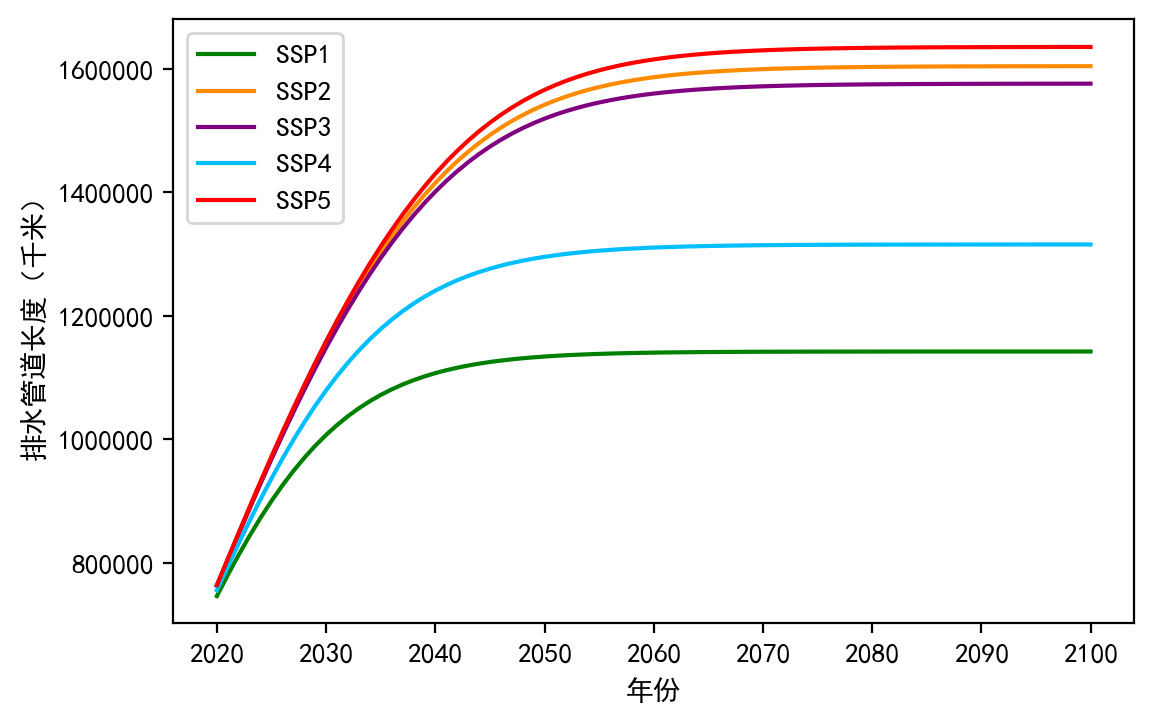

In [18]:
plt.figure(figsize=(6.2,4), dpi=200)
plt.plot(SSP1['YEAR'], SSP1['LDP'], color='green')
plt.plot(SSP2['YEAR'], SSP2['LDP'], color='darkorange')
plt.plot(SSP3['YEAR'], SSP3['LDP'], color='purple')
plt.plot(SSP4['YEAR'], SSP4['LDP'], color='deepskyblue')
plt.plot(SSP5['YEAR'], SSP5['LDP'], color='red')
plt.xlabel('年份')
plt.ylabel('排水管道长度（千米）')
plt.legend(['SSP1', 'SSP2', 'SSP3', 'SSP4', 'SSP5'])
plt.savefig('LDP.png')
plt.show()

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

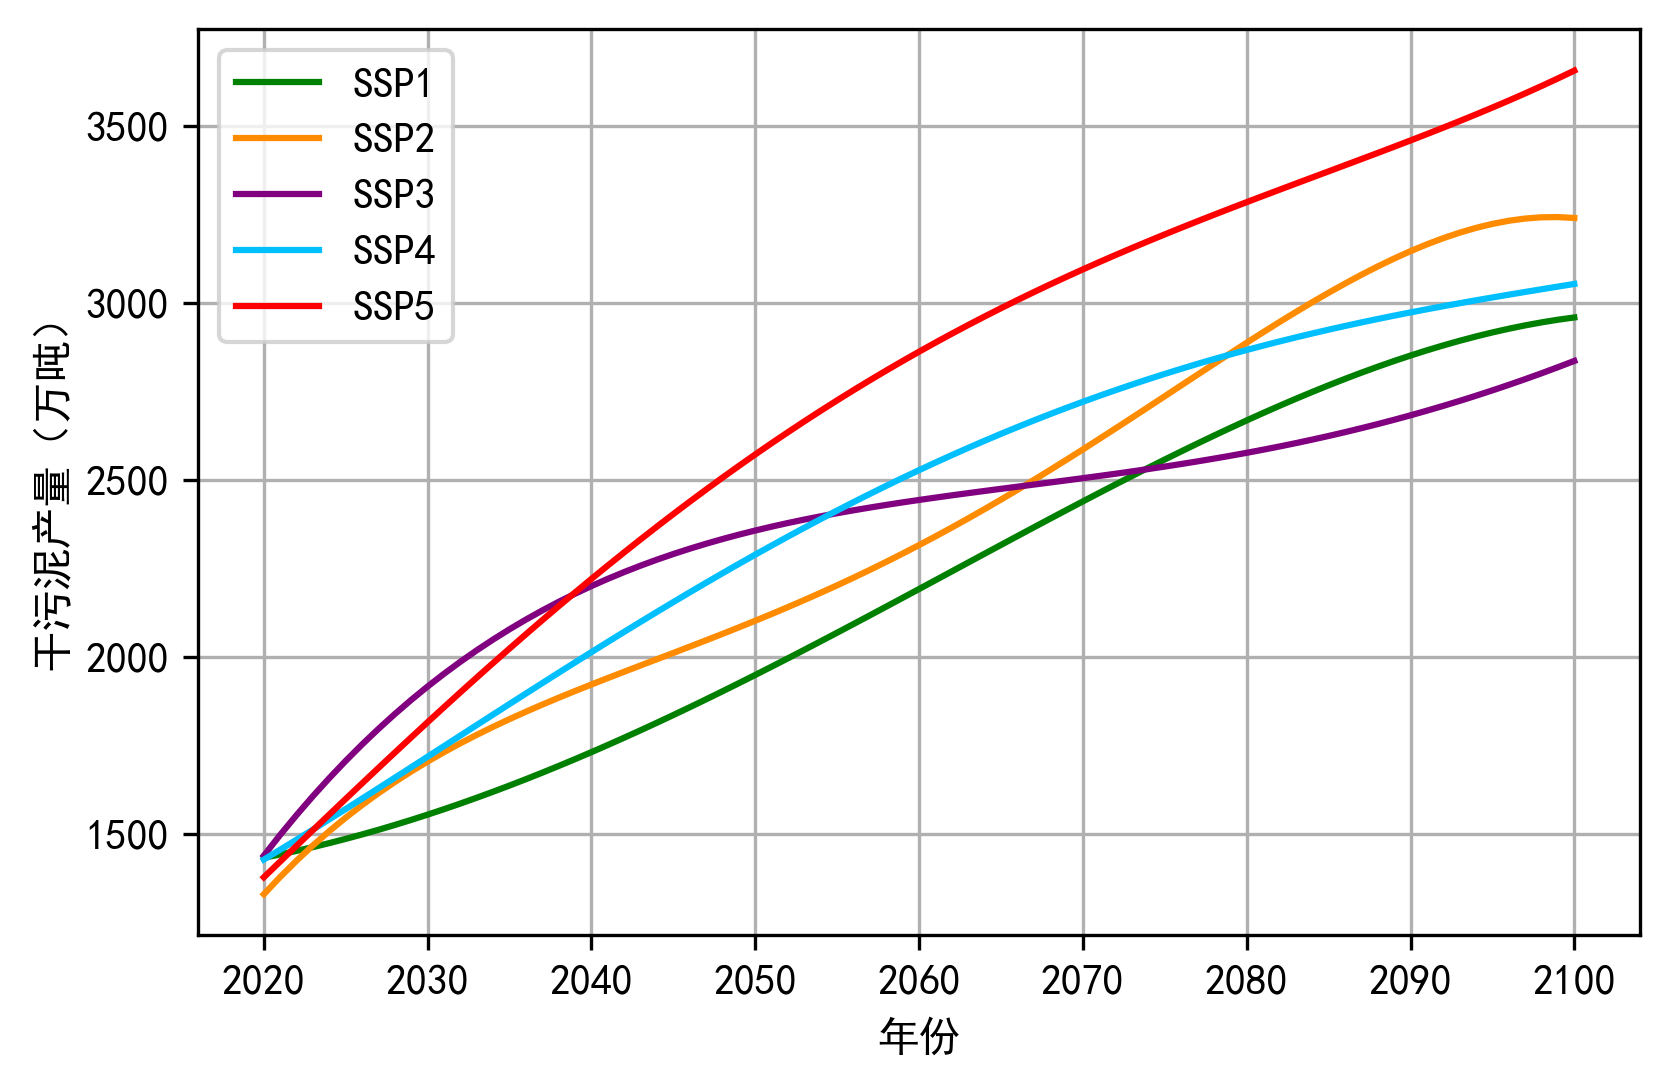

In [12]:
#多项式拟合预测结果
para_ssp1 = np.polyfit(SSP1['YEAR'], SSP1['result'], 4)
parameter_ssp1 = np.poly1d(para_ssp1)
para_ssp2 = np.polyfit(SSP2['YEAR'], SSP2['result'], 4)
parameter_ssp2 = np.poly1d(para_ssp2)
para_ssp3 = np.polyfit(SSP3['YEAR'], SSP3['result'], 4)
parameter_ssp3 = np.poly1d(para_ssp3)
para_ssp4 = np.polyfit(SSP4['YEAR'], SSP4['result'], 4)
parameter_ssp4 = np.poly1d(para_ssp4)
para_ssp5 = np.polyfit(SSP5['YEAR'], SSP5['result'], 4)
parameter_ssp5 = np.poly1d(para_ssp5)
plt.figure(figsize=(6.2,4), dpi=300)
plt.plot(SSP1['YEAR'], parameter_ssp1(SSP1['YEAR'])/10000, color='green')
plt.plot(SSP2['YEAR'], parameter_ssp2(SSP2['YEAR'])/10000, color='darkorange')
plt.plot(SSP3['YEAR'], parameter_ssp3(SSP3['YEAR'])/10000, color='purple')
plt.plot(SSP4['YEAR'], parameter_ssp4(SSP4['YEAR'])/10000, color='deepskyblue')
plt.plot(SSP5['YEAR'], parameter_ssp5(SSP5['YEAR'])/10000, color='red')
plt.legend(['SSP1', 'SSP2', 'SSP3', 'SSP4', 'SSP5'])
plt.grid(True)
plt.xlabel('年份')
plt.ylabel('干污泥产量（万吨）')
plt.savefig('sludge_qg.png')
SSP1['RESULT'] = parameter_ssp1(SSP1['YEAR'])

SSP2['RESULT'] = parameter_ssp2(SSP2['YEAR'])
                                
SSP3['RESULT'] = parameter_ssp3(SSP3['YEAR'])
SSP4['RESULT'] = parameter_ssp4(SSP4['YEAR'])  
SSP5['RESULT'] = parameter_ssp5(SSP5['YEAR'])

SSP1.to_csv('SSP1.csv', encoding='utf-8')
SSP2.to_csv('SSP2.csv', encoding='utf-8')
SSP3.to_csv('SSP3.csv', encoding='utf-8')
SSP4.to_csv('SSP4.csv', encoding='utf-8')
SSP5.to_csv('SSP5.csv', encoding='utf-8')

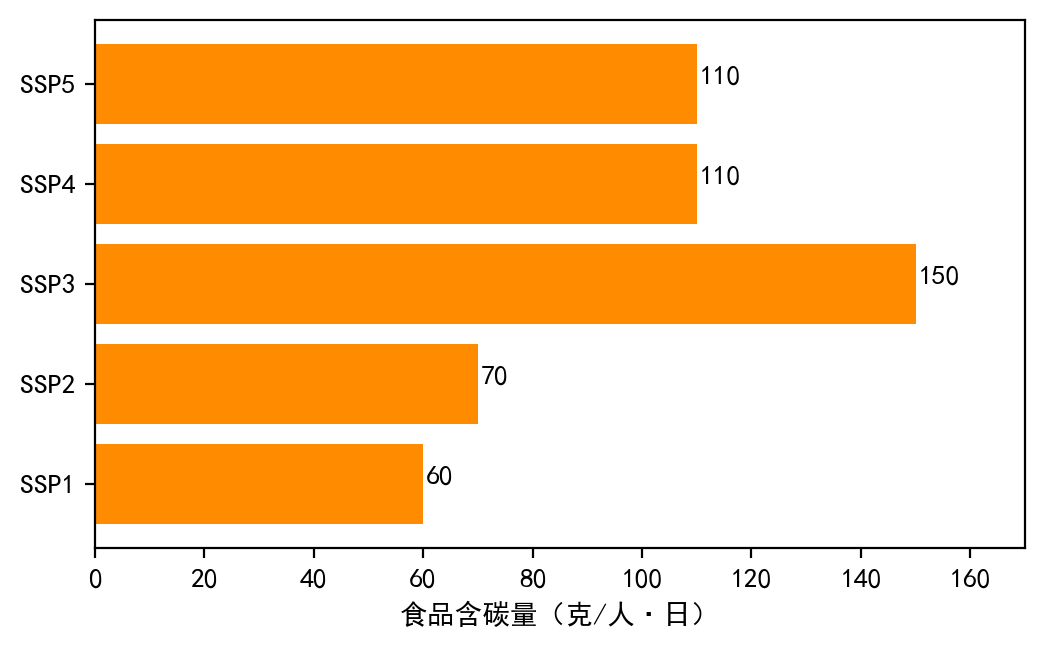

In [51]:
plt.figure(figsize=(6,3.5), dpi=200)
x = ['SSP1', 'SSP2', 'SSP3', 'SSP4', 'SSP5']
y = [60, 70, 150, 110, 110]
plt.xlim(0,170)
plt.barh(x, y, color='darkorange')
for a, b in zip(x, y) :
    plt.text(b+0.5,a, str(b))
plt.xlabel('食品含碳量（克/人·日）')
plt.savefig('C.png')

In [ ]:
#删除全国的数据
nation_tpro = (train_pro['PROVINCE'] == '全国')
nation_val = (validition['PROVINCE'] == '全国')
train_pro = train_pro[~nation_tpro]
validition = validition[~nation_val]

#取对数
def to_log(df, columns):
    for c in columns:
        df[c] = np.log(df[c])
    return df
train_pro = to_log(train_pro, col)
validition = to_log(validition, col)